In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv("house_prices.csv")
df.head()

,Area,Bedrooms,Building_Age,Price
0,152,4,40,282
1,229,4,28,460
2,142,1,14,250
3,64,3,44,50
4,156,5,0,406


<function matplotlib.pyplot.show(close=None, block=None)>

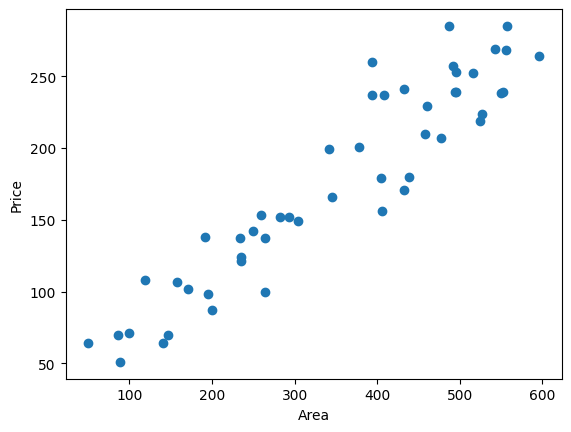

In [61]:
plt.scatter(df.Price, df.Area)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show

In [62]:
X = np.array(df.Area).reshape(-1, 1)
y = np.array(df.Price)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 1972.08
Coefficient of determination: 0.89


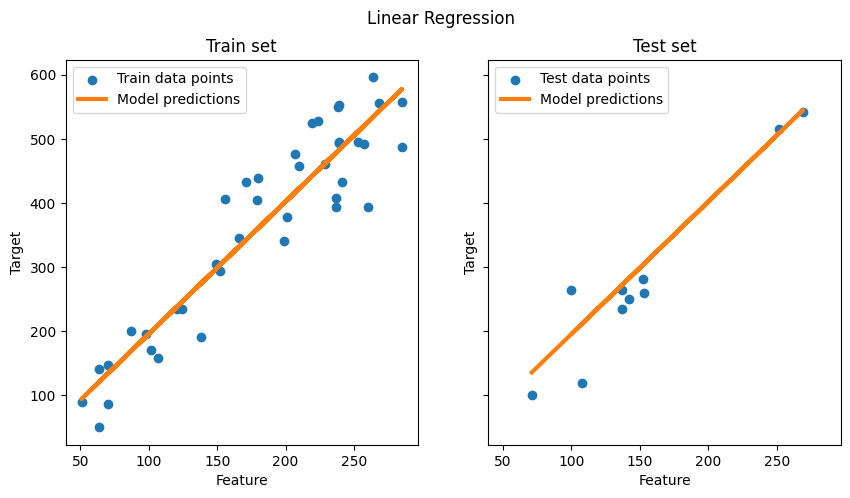

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()